Credit Card Anamoly Detection

Content :
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.




In [17]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM


In [19]:
#reading the data
df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Exploratory Data Analysis

In [21]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [23]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

/tmp/ipython-input-233112715.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['Class'], sort = True)


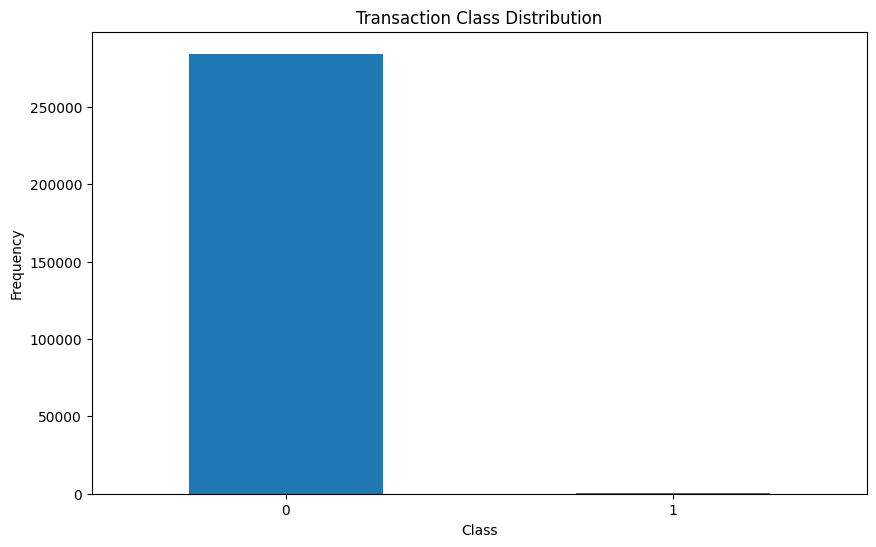

In [24]:
# bar plot of the fraud and valid transactions
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind='bar', figsize=(10,6), rot=0)
plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [25]:
# dividing the dataset into fraud and valid
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]

#cheking the shape of the fraud and valid
print(fraud.shape, valid.shape)

(492, 31) (284315, 31)


In [26]:
#description of the fraud transaction amount
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [27]:
#description of the valid transaction amount
valid.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


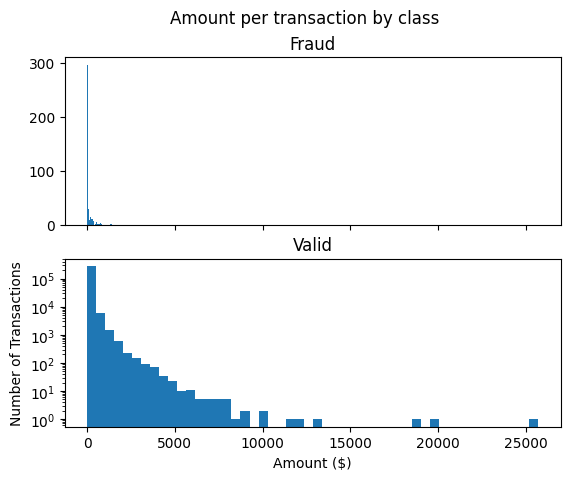

In [28]:
#histplot for the amount of transaction by class
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
ax1.hist(fraud.Amount, bins=50)
ax1.set_title('Fraud')
ax2.hist(valid.Amount, bins=50)
ax2.set_title('Valid')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show();

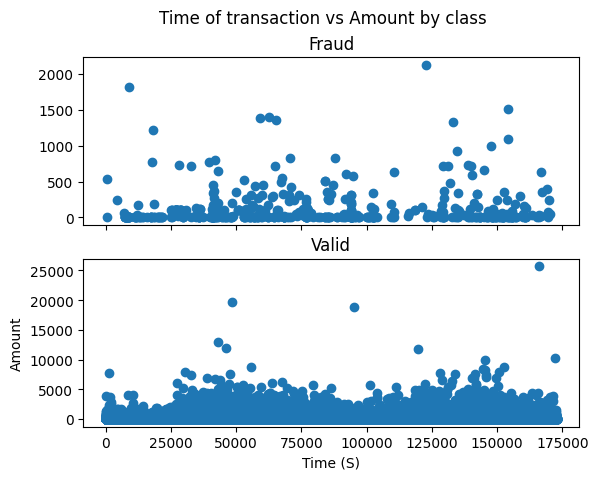

In [29]:
#histplot for the time of transaction by class
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(valid.Time, valid.Amount)
ax2.set_title('Valid')
plt.xlabel('Time (S)')
plt.ylabel('Amount')
plt.show();


In [30]:
## Take a small sample of the data for plotting the correlation
df1 = df.sample(frac=0.1, random_state=1)
df1.shape

(28481, 31)

<Axes: >

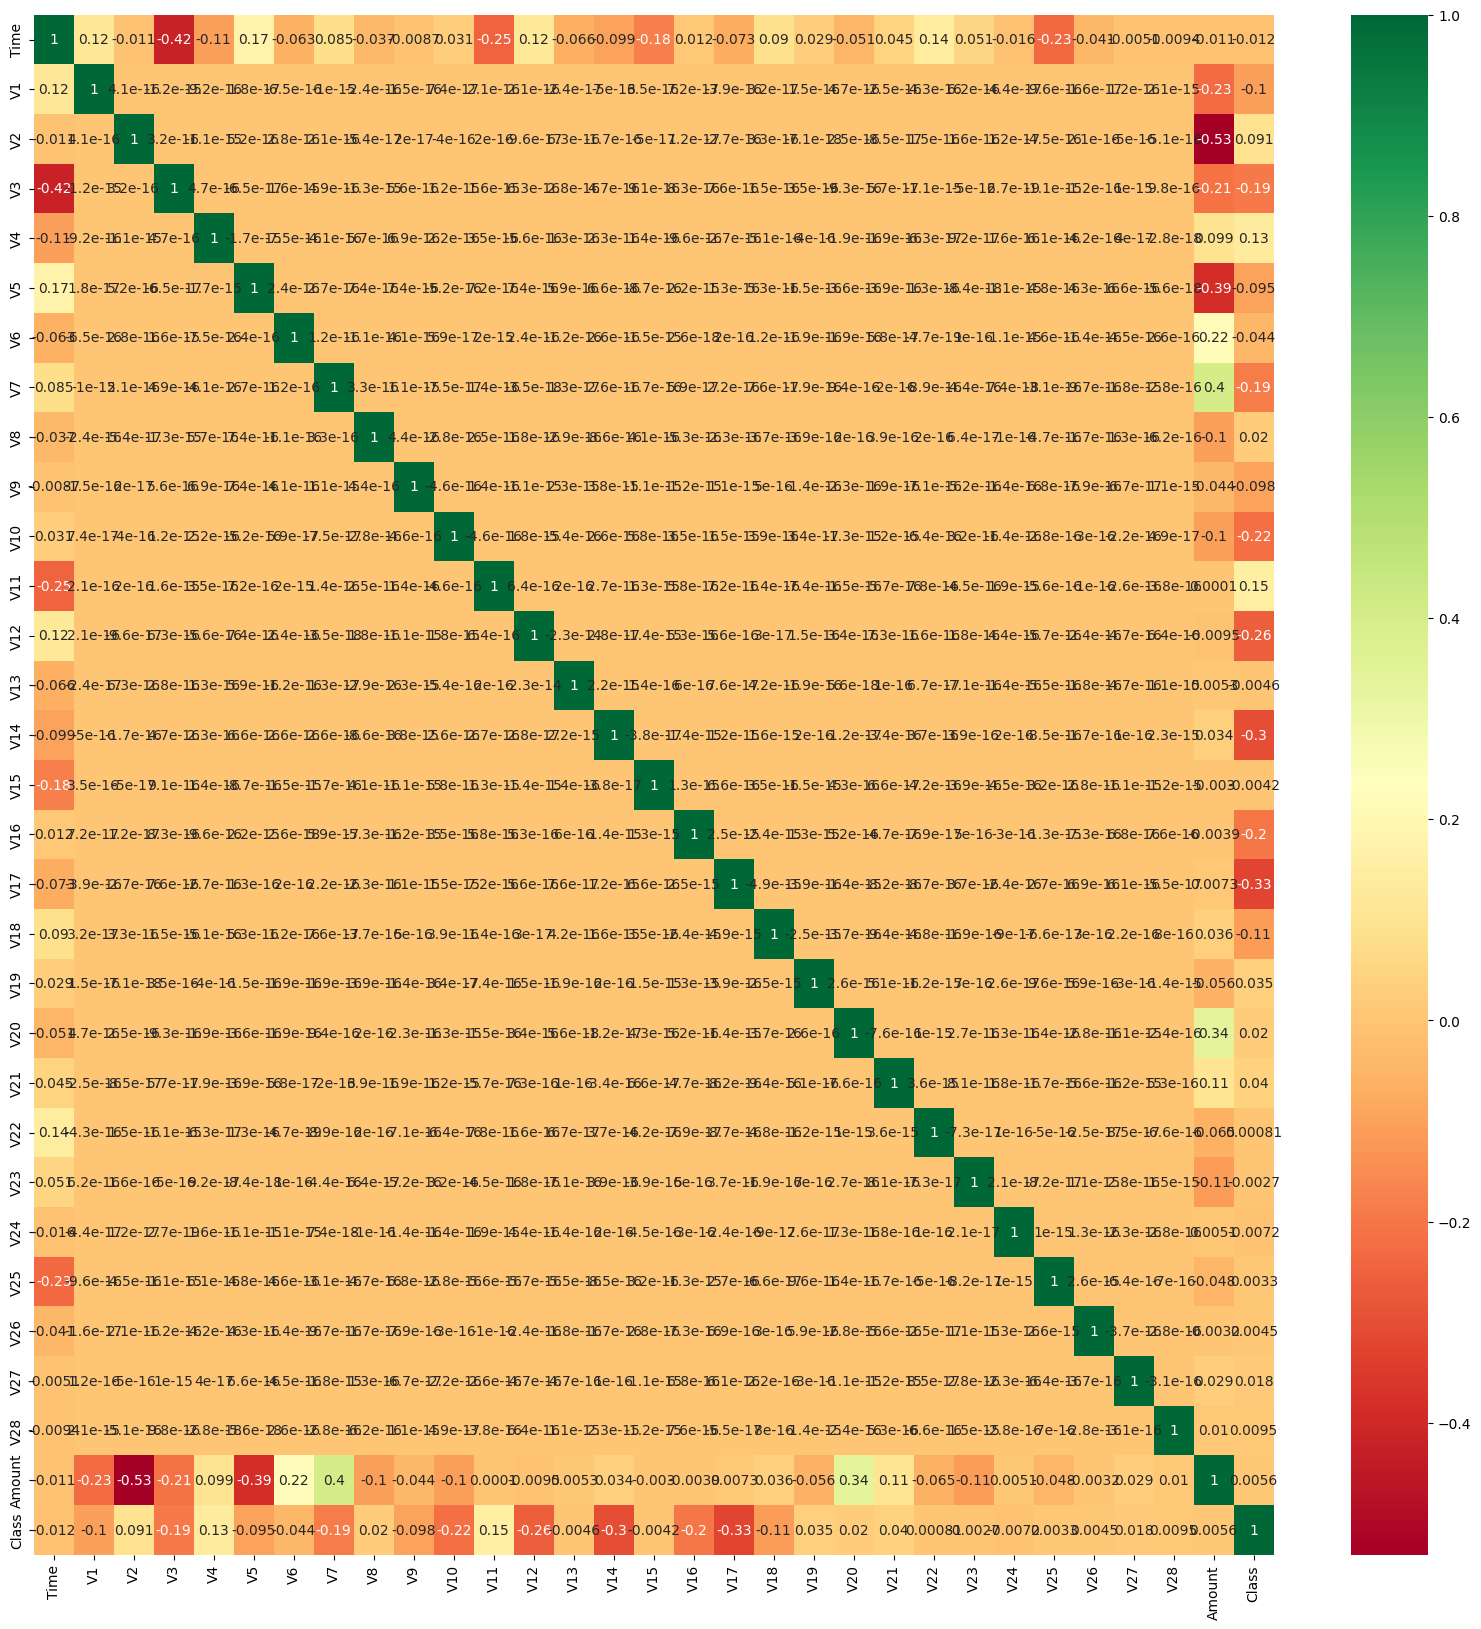

In [31]:
#plotting correlation between all the features
corr = df1.corr()
corr_with_index = corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[corr_with_index].corr(), annot=True, cmap="RdYlGn")

preprocessing of the data for the model

In [32]:
#scaling the data of amount and time because V1,...V28 are already scalled
import pandas as pd
df_copy = df.copy()
df_copys = df.copy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# select features
features = df_copy.loc[:, 'V1':'V28']

# scale 'Amount' and 'Time' separately
df_copy['Scaled_Amount']= scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
df_copy['Scaled_Time']= scaler.fit_transform(df_copy['Time'].values.reshape(-1, 1))


# combine all features into one dataframe
X = pd.concat([features, df_copy[['Scaled_Amount', 'Scaled_Time']]], axis=1)
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Scaled_Amount,Scaled_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,-1.996541


In [33]:
X.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Scaled_Amount',
       'Scaled_Time'],
      dtype='object')

Training the models

Isolation Forest Algorithm - Isolation Forest is a tree-based anomaly detection model that isolates observations by randomly selecting features and split values. Anomalies are easier to isolate and require fewer splits.
Key Traits:
- Fast and scalable to large datasets
- Doesn’t rely on distance or density
- Returns -1 for anomalies and 1 for normal points

In [34]:
#training the model
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.0017, random_state=42)
iso_forest.fit(X)


IsolationForest(contamination=0.0017, random_state=42)

In [35]:
#converting results into binary
y_pred = iso_forest.predict(X)
y_pred_binary = [1 if x==-1 else 0 for x in y_pred]
print(y_pred_binary)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [36]:
#cheking the scores
cr = classification_report(df_copy['Class'], y_pred_binary)
print("classification_report is")
print()
print(f"{cr}")

classification_report is

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.28      0.27      0.28       492

    accuracy                           1.00    284807
   macro avg       0.64      0.64      0.64    284807
weighted avg       1.00      1.00      1.00    284807



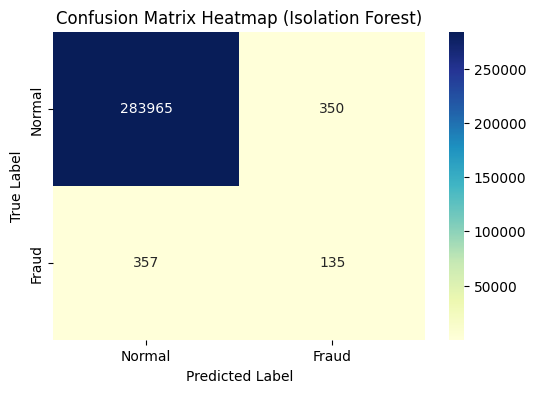

In [37]:
#confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

#get the confusion matrix
cm = confusion_matrix(df_copy['Class'], y_pred_binary)

#define class labels
labels = ['Normal', 'Fraud']

#ploting the confusion matrix using heatmap

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap (Isolation Forest)')
plt.show()

SVM with one class - One-Class SVM is a boundary-based anomaly detection model that learns the shape of the “normal” data distribution and flags anything outside that boundary as an anomaly.
- Trained only on normal data
- Uses a kernel function (usually RBF) to define a flexible decision boundary
- Returns +1 for inliers and -1 for outliers



Selecting the values of class = 0 and training the ocsvm model on that but we will test the model on the entire dataset

In [38]:
df_copys.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [39]:
# scale 'Amount' and 'Time' separately
df_copys['Scaled_Amount']= scaler.fit_transform(df_copys['Amount'].values.reshape(-1, 1))
df_copys['Scaled_Time']= scaler.fit_transform(df_copys['Time'].values.reshape(-1, 1))


In [40]:
df_copys.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Scaled_Amount', 'Scaled_Time'],
      dtype='object')

In [41]:
# Step 1: Filter only class 0 (valid transactions)
df_valid = df_copys[df_copys['Class'] == 0]

# Step 2: Extract V1 to V28 + scaled columns
X_valid = df_valid.loc[:, 'V1':'V28']
scaled_amount = df_valid[['Scaled_Amount']]
scaled_time = df_valid[['Scaled_Time']]

# Step 3: Concatenate them properly
df_combined = pd.concat([X_valid, scaled_amount, scaled_time], axis=1)


In [42]:

df_combined.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Scaled_Amount',
       'Scaled_Time'],
      dtype='object')

In [43]:
df_combined.shape

(284315, 30)

In [44]:

df_combined.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Scaled_Amount,Scaled_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,-1.996541


In [45]:
df_combined.isnull().sum()

,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


In [46]:
from sklearn.svm import OneClassSVM
ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.0017)
ocsvm.fit(df_combined)

OneClassSVM(gamma='auto', nu=0.0017)

In [47]:
df_copys.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Scaled_Amount,Scaled_Time
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964,-1.996583
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475,-1.996583
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686,-1.996562
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534,-1.996562
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403,-1.996541


In [48]:
df_copys.drop(['Time', 'Amount', 'Class'], axis=1, inplace=True)

In [49]:
df_copys.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Scaled_Amount,Scaled_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,-1.996541


In [50]:
y_pred = ocsvm.predict(df_copys)

y_pred_binary_ocsvm = [1 if x==-1 else 0 for x in y_pred]

In [51]:
#cheking the scores
cr = classification_report(df['Class'], y_pred_binary_ocsvm)
print("classification_report is")
print()
print(f"{cr}")

classification_report is

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.24      0.79      0.37       492

    accuracy                           1.00    284807
   macro avg       0.62      0.90      0.69    284807
weighted avg       1.00      1.00      1.00    284807



In [52]:
#acuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(df['Class'], y_pred_binary_ocsvm)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


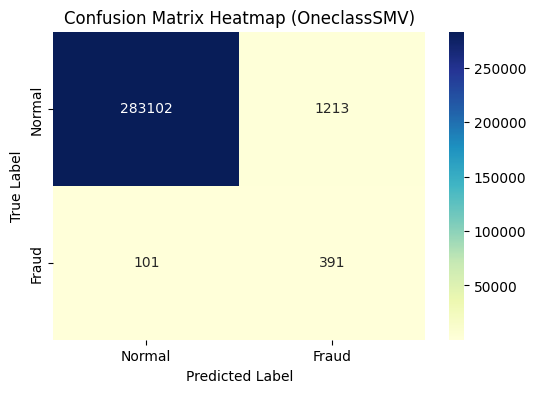

In [53]:
#confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

#get the confusion matrix
cm = confusion_matrix(df['Class'], y_pred_binary_ocsvm)

#define class labels
labels = ['Normal', 'Fraud']

#ploting the confusion matrix using heatmap

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap (OneclassSMV)')
plt.show()

Local Outlier Factor - LOF is a density-based anomaly detection algorithm that compares the local density of each point to its neighbors. Points that are significantly less dense than their surroundings are flagged as outliers
- Works unsupervised (no labels needed)
- Sensitive to local structure — great for detecting subtle anomalies
- Returns -1 for outliers and 1 for inliers


In [54]:
df_copys.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Scaled_Amount',
       'Scaled_Time'],
      dtype='object')

In [55]:
df_copys.shape

(284807, 30)

In [56]:
#local outlier factor
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.0017)  # Adjust contamination rate

#fit and predict
y_pred = lof.fit_predict(df_copys)

In [57]:
# -1 = outlier, 1 = inlier
y_pred_binary_lof = [1 if val == -1 else 0 for val in y_pred]

In [58]:
#cheking the scores
cr = classification_report(df['Class'], y_pred_binary_lof)
print("classification_report is")
print()
print(f"{cr}")

classification_report is

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.00      0.00      0.00       492

    accuracy                           1.00    284807
   macro avg       0.50      0.50      0.50    284807
weighted avg       1.00      1.00      1.00    284807



In [59]:
#acuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(df['Class'], y_pred_binary_lof)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


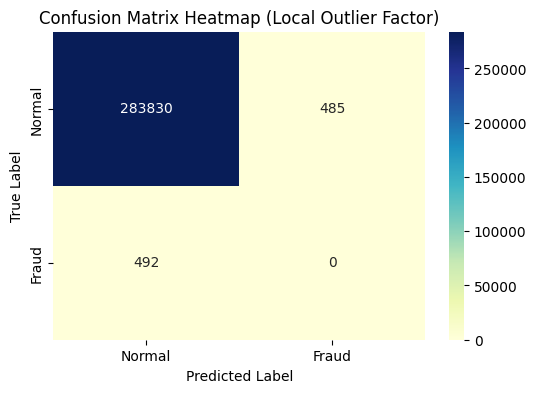

In [60]:
#confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

#get the confusion matrix
cm = confusion_matrix(df['Class'], y_pred_binary_lof)

#define class labels
labels = ['Normal', 'Fraud']

#ploting the confusion matrix using heatmap

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap (Local Outlier Factor)')
plt.show()

Comparing each model

In [68]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

def evaluate_model(name, y_true, y_pred_bin):
    print(f"\n=== {name} ===")
    print(confusion_matrix(y_true, y_pred_bin))
    print(classification_report(y_true, y_pred_bin))
    print("ROC AUC Score:", roc_auc_score(y_true, y_pred_bin))

# Call for each model
evaluate_model("Isolation Forest",df['Class'], y_pred_binary)
evaluate_model("One-Class SVM", df['Class'], y_pred_binary_lof)
evaluate_model("Local Outlier Factor",df['Class'], y_pred_binary_ocsvm)


=== Isolation Forest ===
[[283965    350]
 [   357    135]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.28      0.27      0.28       492

    accuracy                           1.00    284807
   macro avg       0.64      0.64      0.64    284807
weighted avg       1.00      1.00      1.00    284807

ROC AUC Score: 0.6365796074690431

=== One-Class SVM ===
[[283830    485]
 [   492      0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.00      0.00      0.00       492

    accuracy                           1.00    284807
   macro avg       0.50      0.50      0.50    284807
weighted avg       1.00      1.00      1.00    284807

ROC AUC Score: 0.49914707278898407

=== Local Outlier Factor ===
[[283102   1213]
 [   101    391]]
              precision    recall  f1-score   support

           0       1.00      1.00     

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# example using predicted results from each model
def get_scores(y_test, y_pred, model_name):
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

# collect scores for all models
results = []
results.append(get_scores(df['Class'], y_pred_binary, 'Isolation Forest'))
results.append(get_scores(df['Class'], y_pred_binary_ocsvm, 'OneclassSVM'))
results.append(get_scores(df['Class'], y_pred_binary_lof, 'LocalOutlierFactor'))



df_result=pd.DataFrame(results)
df_result

,Model,Accuracy,Precision,Recall,F1 Score
0,Isolation Forest,0.997518,0.278351,0.274390,0.276356
1,OneclassSVM,0.995386,0.243766,0.794715,0.373092
2,LocalOutlierFactor,0.996570,0.000000,0.000000,0.000000


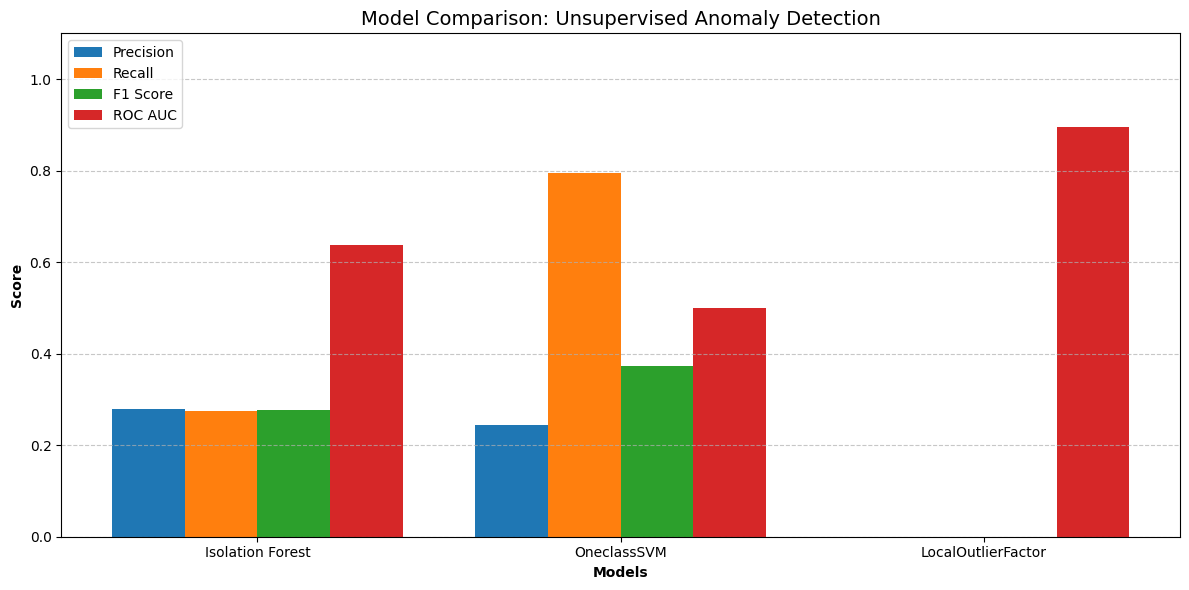

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Extract data from df_result
model_name = df_result['Model']
precision = df_result['Precision']
recall = df_result['Recall']
f1 = df_result['F1 Score']
# Assuming you want ROC AUC as well, extract it from the previous evaluation output
# I'll manually add the ROC AUC scores from the previous cell's output
roc_auc = [0.6365796074690431, 0.49914707278898407, 0.8952245262432929]


# Set width of bar
bar_width = 0.2
r1 = np.arange(len(model_name))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create the plot
plt.figure(figsize=(12, 6))
plt.bar(r1, precision, width=bar_width, label='Precision')
plt.bar(r2, recall, width=bar_width, label='Recall')
plt.bar(r3, f1, width=bar_width, label='F1 Score')
plt.bar(r4, roc_auc, width=bar_width, label='ROC AUC')

# Add labels and formatting
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Score', fontweight='bold')
plt.title('Model Comparison: Unsupervised Anomaly Detection', fontsize=14)
plt.xticks([r + bar_width*1.5 for r in range(len(model_name))], model_name)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [72]:
recall_score(df['Class'], y_pred_binary_lof)

0.0